### Desafío 3: Elaboración de un modelo de clasificación
#### Etapa 5 - Se prueba hacer un modelo de árboles de decisión

In [1]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [2]:
#Lectura del archivo
df=pd.read_csv('Df_CyT_us.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,sexo,producciones_ult_anio,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,max_grado_academico,gran_area_experticia,area_experticia,disciplina_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,Presento_ultimo_año,rango_edad
0,F,0,0,1,1,Universitario de grado,HUMANIDADES,Lengua y Literatura,Estudios Generales de Literatura,DOCENTE,Interino,De 0 hasta 19 horas,Jefe de trabajos prácticos,No pertenece a Conicet,0,"(20, 30]"
1,F,0,0,0,1,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,Ciencias Químicas,Química Orgánica,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Ayudante Docente A,No pertenece a Conicet,0,"(30, 40]"
2,F,0,0,0,0,Universitario de grado,CIENCIAS SOCIALES,Psicología,Otras Psicología,OTRO PERSONAL DE LA INSTITUCION,no docente,0,no docente,No pertenece a Conicet,0,"(60, 70]"
3,M,0,0,0,0,Universitario de grado,INGENIERÍAS Y TECNOLOGÍAS,Ingeniería de los Materiales,Recubrimientos y Películas,BECARIO DE I+D,Interino,De 0 hasta 19 horas,Ayudante de trabajos prácticos de primera,No pertenece a Conicet,0,"(30, 40]"
4,F,0,1,7,4,Universitario de posgrado/doctorado,CIENCIAS NATURALES Y EXACTAS,Ciencias Físicas,Otras Ciencias Físicas,INVESTIGADOR,Regular o por concurso,40 horas o más,Profesor asociado,Investigador independiente,0,"(40, 50]"


In [3]:
df.columns

Index(['sexo', 'producciones_ult_anio', 'prod_año_anterior',
       'prod_2_años_anteriores', 'prod_3_años_anteriores',
       'max_grado_academico', 'gran_area_experticia', 'area_experticia',
       'disciplina_experticia', 'tipo_personal', 'condicion_docente',
       'ded_horaria_docente', 'clase_cargo_docente', 'categoria_conicet',
       'Presento_ultimo_año', 'rango_edad'],
      dtype='object')

In [4]:
#Se generan dummies para sexo 
df_dummies = pd.get_dummies(df['sexo'], prefix='sexo',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='sexo',inplace=True)

In [5]:
#Se generan dummies para rango_edad 
df_dummies = pd.get_dummies(df['rango_edad'], prefix='edad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='rango_edad',inplace=True)

In [6]:
#Se generan dummies para tipo_personal
df_dummies = pd.get_dummies(df['tipo_personal'], prefix='t_personal',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='tipo_personal',inplace=True)

In [7]:
#Se generan dummies para condicion_docente
df_dummies = pd.get_dummies(df['condicion_docente'], prefix='cond_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='condicion_docente',inplace=True)

In [8]:
#Se generan dummies para ded_horaria_docente
df_dummies = pd.get_dummies(df['ded_horaria_docente'], prefix='ded_horaria',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='ded_horaria_docente',inplace=True)

In [9]:
#Se generan dummies para max_grado_academico
df_dummies = pd.get_dummies(df['max_grado_academico'], prefix='grado_acad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='max_grado_academico',inplace=True)

In [10]:
#Se generan dummies para categoria_conicet
df_dummies = pd.get_dummies(df['categoria_conicet'], prefix='cat_conicet',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='categoria_conicet',inplace=True)

In [11]:
#Se generan dummies para clase_cargo_docente
df_dummies = pd.get_dummies(df['clase_cargo_docente'], prefix='clase_cargo_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='clase_cargo_docente',inplace=True)

In [12]:
#Se generan dummies para 'gran_area_experticia'
df_dummies = pd.get_dummies(df['gran_area_experticia'], prefix='area_exp',drop_first=True)
df_gran_area=pd.concat([df,df_dummies], axis=1)
df_gran_area.drop(columns='gran_area_experticia',inplace=True)

In [13]:
#Se define la matriz target y la matriz de features
X_ga=df_gran_area.drop(columns=['producciones_ult_anio','area_experticia', 'disciplina_experticia',
       'Presento_ultimo_año'])

y_ga =df_gran_area['Presento_ultimo_año']

In [14]:
# Hacemos el split entre train y test
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_ga, y_ga, test_size = 0.33)

Mejor score: 0.38335325689635064
Mejor depth: 5


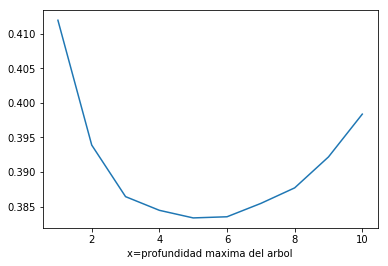

In [15]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X_train_ga, y_train_ga, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # Selecciona el mejor comparando con el mejor hasta ahora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # Agrega a la lista de scores para graficar
    all_scores.append(current_score)
    
print("Mejor score: %s" % best_score)
print("Mejor depth: %s" % best_depth)

# Graficar el error como función del max_depth
plt.figure()
plt.plot(range(1, 11), all_scores)
plt.xlabel('x=profundidad maxima del arbol');

In [16]:
treereg_cv = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
treereg_cv.fit(X_train_ga, y_train_ga)

preds_cv = treereg_cv.predict(X_test_ga)

In [17]:
from sklearn.metrics import r2_score

r2_score(y_test_ga, preds_cv)

0.20513039401684374

In [18]:
print(precision_score(y_test_ga, preds_cv))

0.8143617021276596


In [19]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train_ga, y_train_ga, cv=5, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))
    
   
dt = DecisionTreeClassifier(class_weight='balanced')

evaluar_rendimiento(dt,"Árbol de decisión")

Rendimiento de Árbol de decisión:	0.719 ± 0.005


In [20]:
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')

evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.719 ± 0.005
Rendimiento de Bagging AD:	0.762 ± 0.004
Rendimiento de Random Forest:	0.767 ± 0.004
Rendimiento de Extra Trees:	0.743 ± 0.003


In [35]:
dt.fit(X_train_ga,y_train_ga)
bdt.fit(X_train_ga,y_train_ga)
rf.fit(X_train_ga,y_train_ga)
et.fit(X_train_ga,y_train_ga)


ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [38]:
dt_pred=dt.predict(X_test_ga)
bdt_pred=bdt.predict(X_test_ga)
rf_pred=rf.predict(X_test_ga)
et_pred=et.predict(X_test_ga)

In [39]:
print(precision_score(y_test_ga, dt_pred))
print(precision_score(y_test_ga, bdt_pred))
print(precision_score(y_test_ga, rf_pred))
print(precision_score(y_test_ga, et_pred))


0.7290040999867743
0.7733138220034588
0.7860314897052887
0.7642265380958848


In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 21], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [22]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
rf = RandomForestClassifier(class_weight='balanced')
kf = StratifiedKFold(n_splits=3, shuffle=True)

In [23]:
grid_search_rf = GridSearchCV(rf, param_grid=param_trees, cv=kf, verbose=1, n_jobs=3)

In [24]:
grid_search_rf.fit(X_train_ga, y_train_ga)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   18.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  8.5min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 17.9min
[Parallel(n_jobs=3)]: Done 1125 out of 1125 | elapsed: 28.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 20, 50, 70, 100], 'min_samples_leaf': [1, 5, 8, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [25]:
grid_search_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [26]:
grid_search_rf.best_score_

0.8017648715461402

In [28]:
print(precision_score(y_test_ga, grid_pred))

0.8176832530765115


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0572698 to fit



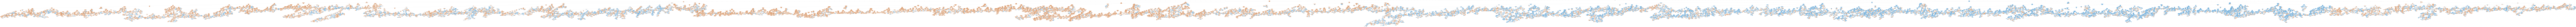

In [41]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=export_graphviz(dt, out_file=None,  
                feature_names=X_train_ga.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  